
# Tutorial: Choosing the Right Metric for Your Business Problem

Sejauh ini, kita telah belajar *bagaimana* menghitung berbagai metrik evaluasi. Sekarang, kita akan menjawab pertanyaan yang lebih penting: ***metrik mana yang harus saya pedulikan?***

Jawaban yang benar hampir selalu: **"Tergantung pada masalah bisnisnya."**

Tidak ada satu metrik "terbaik" untuk semua situasi. Metrik yang paling relevan adalah metrik yang paling selaras dengan tujuan bisnis dan paling akurat mencerminkan konsekuensi finansial atau operasional dari kesalahan prediksi.

Di notebook ini, kita akan menjelajahi beberapa skenario bisnis dan belajar cara memilih metrik evaluasi yang paling tepat untuk masing-masing skenario.




---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Menghubungkan metrik teknis (MAE, RMSE, R²) dengan tujuan bisnis yang nyata.
* Menganalisis trade-off antara berbagai jenis kesalahan prediksi.
* Memilih metrik evaluasi yang paling sesuai untuk berbagai skenario masalah.
* Memahami bahwa analisis residual seringkali lebih berwawasan daripada satu angka metrik saja.




---
### 2. Setup: Skenario Prediksi Harga Rumah

Mari kita buat sebuah skenario. Kita telah melatih sebuah model untuk memprediksi harga rumah. Sekarang, kita perlu mengevaluasi seberapa "baik" model ini dari perspektif bisnis yang berbeda.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set_theme(style="whitegrid", context="talk")


# data sampel
y_true = np.array([300,450,500,650,700,850,1200,1500])
y_pred_A = np.array([320,440,530,640,710,830,1150,1480])
y_pred_B = np.array([320,440,530,640,710,830,950,1480]) # prediksi ke-7 sangat meleset

# fungsi untuk menghitung semua metrik sekaligus

def calculate_all_metrics(y_true,y_pred, model_name):
	mae = mean_absolute_error(y_true, y_pred)
	rmse = np.sqrt(mean_squared_error(y_true, y_pred))
	r2 = r2_score(y_true, y_pred)

	print(f"--- Metrik untuk {model_name} ---")
	print(f"MAE:  {mae:,.2f} Juta Rupiah")
	print(f"RMSE: {rmse:,.2f} Juta Rupiah")
	print(f"R²:   {r2:.3f}")
	return mae,rmse,r2

mae_A,rmse_A,r2_A = calculate_all_metrics(y_true,y_pred_A,"Model A")
mae_B,rmse_B,r2_B = calculate_all_metrics(y_true,y_pred_B,"Model B")

--- Metrik untuk Model A ---
MAE:  21.25 Juta Rupiah
RMSE: 24.75 Juta Rupiah
R²:   0.996
--- Metrik untuk Model B ---
MAE:  46.25 Juta Rupiah
RMSE: 90.07 Juta Rupiah
R²:   0.943



---
### 3. Skenario 1: Laporan untuk Klien Real Estate

**Konteks Bisnis:** Anda adalah seorang analis di sebuah agensi real estate. Anda perlu melaporkan performa model prediksi harga kepada manajer penjualan. Manajer ini tidak peduli dengan "kesalahan kuadrat"; mereka ingin tahu, "Rata-rata, seberapa jauh prediksi kita dari harga jual sebenarnya?"

**Pertanyaan:** Metrik mana yang paling cocok untuk komunikasi ini?

**Analisis:**
* **MAE** adalah pilihan yang sempurna. Interpretasinya langsung dan mudah dipahami oleh audiens non-teknis. Kalimat seperti, "Pak, model kita rata-rata meleset sekitar 21.25 Juta Rupiah dari harga sebenarnya" sangat jelas dan dapat ditindaklanjuti.
* **RMSE** (24.75 Juta Rupiah) sedikit lebih tinggi dan lebih sulit dijelaskan.
* **R²** (0.99) terdengar bagus, tetapi tidak memberikan gambaran tentang besarnya kesalahan dalam mata uang.

**Kesimpulan Skenario 1:** Untuk komunikasi eksternal atau kepada pemangku kepentingan non-teknis, **MAE** seringkali menjadi pilihan terbaik karena interpretabilitasnya yang tinggi.




---
### 4. Skenario 2: Deteksi Internal & Manajemen Risiko

**Konteks Bisnis:** Anda adalah seorang *data scientist* yang bertanggung jawab untuk memelihara model. Anda tahu bahwa membuat satu kesalahan prediksi yang sangat besar (misalnya, salah memprediksi harga rumah sebesar 250 juta) jauh lebih merusak reputasi perusahaan daripada membuat beberapa kesalahan kecil (misalnya, 10 kesalahan masing-masing 25 juta). Anda ingin metrik yang sensitif terhadap *blunder* besar ini.

**Pertanyaan:** Metrik mana yang paling cocok untuk tujuan ini?

**Analisis:**
Mari kita bandingkan performa Model A dan Model B.
* **MAE:** `mae_B` (46.25) hanya sekitar 2.3 kali lebih besar dari `mae_A` (21.25). MAE melihat kesalahan besar ini, tetapi tidak memberikan "alarm" yang sangat kuat.
* **RMSE:** `rmse_B` (90.07) hampir **3.6 kali lebih besar** dari `rmse_A` (24.75). Karena RMSE mengkuadratkan error, kesalahan besar sebesar 250 juta pada Model B dihukum secara eksponensial, membuat skor RMSE "meledak".

**Kesimpulan Skenario 2:** Untuk evaluasi internal oleh tim teknis dan manajemen risiko, **RMSE** adalah pilihan yang lebih unggul. **Jika RMSE jauh lebih besar dari MAE**, itu adalah sinyal alarm yang jelas bahwa model Anda membuat beberapa kesalahan yang sangat besar yang perlu diselidiki.




---
### 5. Skenario 3: Analisis Biaya Asimetris (Studi Kasus Prediksi Stok)

**Konteks Bisnis:** Bayangkan Anda sekarang memprediksi permintaan bulanan untuk sebuah produk. Konsekuensi dari kesalahan tidaklah sama:

* **Under-prediction (menebak terlalu rendah):** Anda memesan terlalu sedikit stok. Akibatnya: rak kosong, pelanggan kecewa, dan **kehilangan potensi penjualan**. Biayanya tinggi.
* **Over-prediction (menebak terlalu tinggi):** Anda memesan terlalu banyak stok. Akibatnya: biaya penyimpanan meningkat, modal terikat, dan risiko produk kadaluwarsa. Biayanya ada, tetapi mungkin lebih rendah daripada kehilangan penjualan.

**Pertanyaan:** Apakah MAE atau RMSE cukup?

**Analisis:**
Tidak juga. Kedua metrik tersebut memperlakukan kesalahan *under-prediction* dan *over-prediction* secara **simetris** (misalnya, meleset +10 dan meleset -10 dianggap sama buruknya). Dalam kasus ini, kita lebih peduli pada **arah kesalahan**.

Solusinya adalah **analisis residual**. Residual dihitung sebagai `(Nilai Aktual - Nilai Prediksi)`.
* `Residual > 0`: `Aktual > Prediksi` -> **Under-prediction** (masalah besar dalam kasus ini!)
* `Residual < 0`: `Aktual < Prediksi` -> **Over-prediction**

Mari kita analisis residual dari Model A.



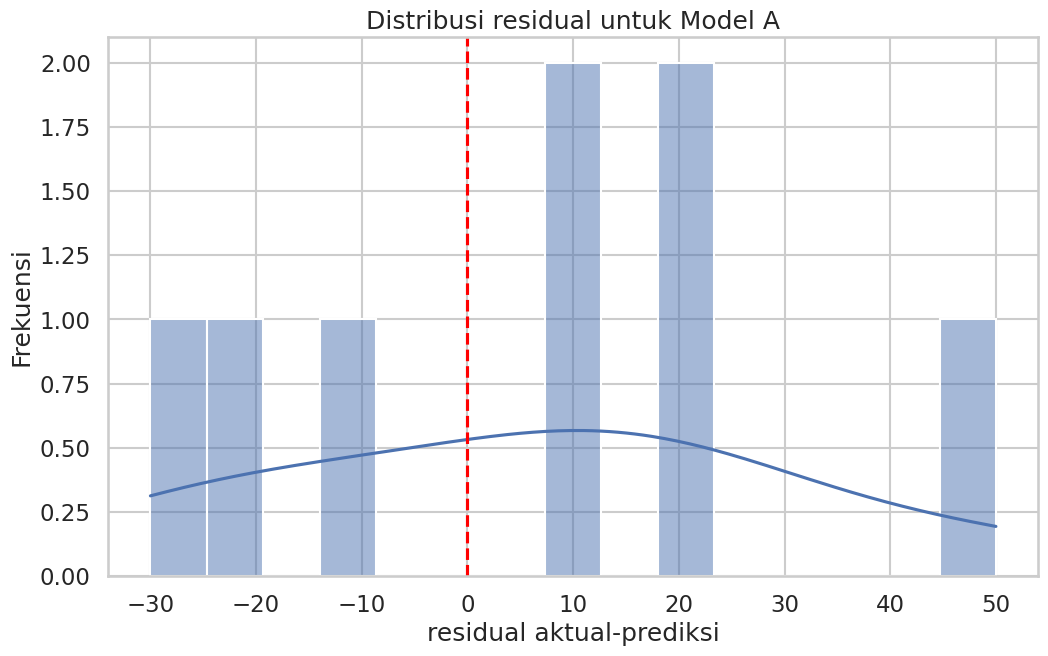

analisis residual
jumlah underprediction (residual > 0): 5
jumlah oveprediction (residual < 0): 3


In [2]:
residuals_A = y_true - y_pred_A

plt.figure(figsize=(12,7))
sns.histplot(residuals_A, kde=True, bins=15)
plt.axvline(0,color='red',linestyle="--")
plt.title("Distribusi residual untuk Model A")
plt.xlabel("residual aktual-prediksi")
plt.ylabel('Frekuensi')
plt.show()

print("analisis residual")
print(f"jumlah underprediction (residual > 0): {np.sum(residuals_A>0)}")
print(f"jumlah oveprediction (residual < 0): {np.sum(residuals_A<0)}")


**Kesimpulan Skenario 3:** Dalam kasus biaya asimetris, mengandalkan satu angka metrik saja tidak cukup. Anda harus **menganalisis distribusi residual** untuk memahami apakah model Anda memiliki bias sistematis ke arah tertentu (cenderung *under* atau *over-predict*). Anda mungkin perlu menyesuaikan model atau ambang batas keputusan Anda berdasarkan analisis ini.




---
### 6. Ringkasan & Panduan Praktis

| Jika Tujuan Anda Adalah... | Mulailah dengan Metrik Ini... | Dan Perhatikan Juga... |
| :--- | :--- | :--- |
| **Komunikasi** dengan audiens non-teknis | **MAE** | - |
| **Evaluasi Internal & Stabilitas Model** | **RMSE** | Jika RMSE >> MAE, selidiki prediksi outlier. |
| **Perbandingan Model** dengan fitur berbeda | **Adjusted R²** | R² biasa untuk konteks umum. |
| **Memahami Biaya Bisnis** yang Asimetris | **Analisis Residual** | MAE/RMSE sebagai gambaran umum kesalahan. |

Pemilihan metrik adalah bagian dari seni dan ilmu dalam *machine learning*. Dengan selalu menghubungkan metrik Anda kembali ke masalah bisnis yang nyata, Anda akan dapat membuat keputusan yang lebih cerdas dan memberikan nilai yang lebih besar.
